<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/mnist_numeric_recognition_keras_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image recognition using MNIST library**

**1. Data import and review**

In [0]:
# Load libraries
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers

from keras.utils import to_categorical

In [0]:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
# Import data
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

In [13]:
# Review data
print(color.BOLD+'train_images_raw:'+color.END)
print('Shape: ', train_images_raw.shape)
print('Type: ', type(train_images_raw))
print('dtype: ', train_images_raw.dtype)
print('ndim: ', train_images_raw.ndim)

print(color.BOLD+'\ntrain_labels_raw:'+color.END)
print('Shape: ', train_labels_raw.shape)
print('Type: ', type(train_labels_raw))
print('dtype: ', train_labels_raw.dtype)
print('ndim: ', train_labels_raw.ndim)

print(color.BOLD+'\ntest_images_raw:'+color.END)
print('Shape: ', test_images_raw.shape)
print('Type: ', type(test_images_raw))
print('dtype: ', test_images_raw.dtype)
print('ndim: ', test_images_raw.ndim)

print(color.BOLD+'\ntest_labels_raw:'+color.END)
print('Shape: ', test_labels_raw.shape)
print('Type: ', type(test_labels_raw))
print('dtype: ', test_labels_raw.dtype)
print('ndim: ', test_labels_raw.ndim)

train_images_raw:
Shape:  (60000, 28, 28)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  3

train_labels_raw:
Shape:  (60000,)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  1

test_images_raw:
Shape:  (10000, 28, 28)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  3

test_labels_raw:
Shape:  (10000,)
Type:  <class 'numpy.ndarray'>
dtype:  uint8
ndim:  1



Review train_images_raw


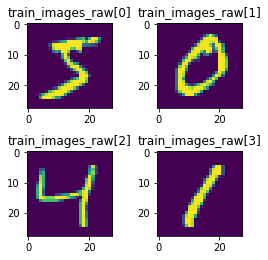


Review test_images_raw


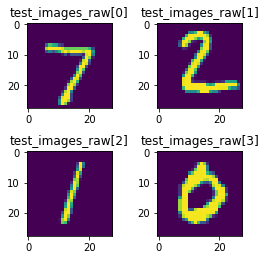

In [14]:
# Review examples
print(color.BOLD+color.UNDERLINE+'\nReview train_images_raw'+color.END)
fig=plt.figure(figsize=(4, 4))
columns = 2
rows = 2
for i in range(1, columns*rows+1):
    img = train_images_raw[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title('train_images_raw['+str(i-1)+']')
    plt.subplots_adjust(top = 0.75, bottom=0.01, hspace=0.5, wspace=0.4)    
plt.show()

print(color.BOLD+color.UNDERLINE+'\nReview test_images_raw'+color.END)
fig=plt.figure(figsize=(4, 4))
columns = 2
rows = 2
for i in range(1, columns*rows+1):
    img = test_images_raw[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title('test_images_raw['+str(i-1)+']')
    plt.subplots_adjust(top = 0.75, bottom=0.01, hspace=0.5, wspace=0.4)    
plt.show()

**2. Neural Network construction**

In [15]:
# Prepare image data
train_images = train_images_raw.reshape((60000, 28*28)).astype('float32') / 255
#train_images = train_images.astype('float32') / 255

test_images = test_images_raw.reshape((10000, 28*28)).astype('float32') / 255
#test_images = test_images.astype('float32') / 255

# Prepare labels
train_labels = to_categorical(train_labels_raw)
test_labels = to_categorical(test_labels_raw)

# Review data
print('Shape of train_images', train_images.shape)
print('Shape of train_labels', train_labels.shape)
print('Shape of test_images', test_images.shape)
print('Shape of test_labels', test_labels.shape)

Shape of train_images (60000, 784)
Shape of train_labels (60000, 10)
Shape of test_images (10000, 784)
Shape of test_labels (10000, 10)


In [16]:
# Construct network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Network compilation
# categorical_crossentropy is loss function as feedback sigal for learning the weight 
# tensors. Reduction of loss happens via minibatch stochastic gradient descent. Rules governing
# gradient descent defined in rmsprop 
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Training loop
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2569 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1035 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0692 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0371 - accuracy: 0.9889


**3. Review model**

In [17]:
# Review accuracy
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 0s 45us/step
test_loss:  0.07130469548311084
test_acc:  0.978600025177002


In [19]:
# Spot test
print(color.BOLD+color.UNDERLINE+'\nReview samples'+color.END)

samples = 1000

sample_pred = []
for i in range(1, samples+1):
    sample_pred.append(network.predict(test_images_raw[i-1].reshape((1, 28*28)).astype('float32')).argmax())

print('test_labels_raw:  ', list(test_labels_raw[0:samples]))
print('Predicted Labels: ', sample_pred[0:samples])
print('Identical?:', list(test_labels_raw[0:samples]) == sample_pred[0:samples] )

element_check = []
for j in range(1, samples+1):
  running_check = list(test_labels_raw[0:samples])[j-1] == sample_pred[0:samples][j-1]
  if running_check == True:
    element_check.append(0)
  else:
    element_check.append(1)

print('Total false predictions: ', sum(element_check), 'out of a total of', samples, 'samples')


Review samples
test_labels_raw:   [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2